In [1]:
%pylab inline
import networkx as nx
import pandas as pd
import random
from flask import jsonify
import json
from tqdm import tqdm
import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
treesR=pd.read_json("scrape/1km.json")

In [3]:
treesR.head()

,geometry,id,properties,type
0,"{'type': 'Point', 'coordinates': [13.421149160...",221071,"{'borough': 'Friedrichshain-Kreuzberg', 'circu...",Feature
1,"{'type': 'Point', 'coordinates': [13.435584960...",221104,"{'borough': 'Friedrichshain-Kreuzberg', 'circu...",Feature
2,"{'type': 'Point', 'coordinates': [13.435080069...",221105,"{'borough': 'Friedrichshain-Kreuzberg', 'circu...",Feature
3,"{'type': 'Point', 'coordinates': [13.435223027...",221106,"{'borough': 'Friedrichshain-Kreuzberg', 'circu...",Feature
4,"{'type': 'Point', 'coordinates': [13.424398429...",222395,"{'borough': 'Friedrichshain-Kreuzberg', 'circu...",Feature


In [4]:
co=[t['coordinates'] for t in treesR.geometry]
x,y=transpose(co)
id=treesR.id

In [5]:
len(x)

3253

In [6]:
trees=pd.DataFrame({'id':id,'x':x,'y':y})
trees.tail()

,id,x,y
3248,260052,13.423880,52.499481
3249,260053,13.423701,52.499575
3250,260054,13.423584,52.499429
3251,260055,13.423068,52.499390
3252,260056,13.423329,52.499633


In [7]:
from scipy.spatial.distance import pdist, squareform


In [8]:
po= [[x1,y1] for _,(i1,x1,y1)in trees.iterrows()]


In [9]:
di=pdist(po,'euclidean')
di=squareform(di)
shape(di)

(3253, 3253)

In [10]:
G=nx.Graph()
for i1,(id1,x1,y1) in tqdm(trees.iterrows(),total=len(trees)):
    for i2,(id2,x2,y2) in trees.iterrows():
        if i1 < i2:
            dist = di[i1][i2]#(x1-x2)**2+(y1-y2)**2
           # print(dist)
            if dist<0.004:
                G.add_edge(int(id1), int(id2),weight=dist**2)

100%|██████████████████████████████████████████████████████████████████████████████| 3253/3253 [08:59<00:00,  6.34it/s]


In [11]:
for s in nx.components.connected.connected_components(G):
    print(len(s))

3253


In [12]:
trees.head()


,id,x,y
0,221071,13.421149,52.505113
1,221104,13.435585,52.499304
2,221105,13.435080,52.499199
3,221106,13.435223,52.499129
4,222395,13.424398,52.504431


In [13]:
trees.tail()


,id,x,y
3248,260052,13.423880,52.499481
3249,260053,13.423701,52.499575
3250,260054,13.423584,52.499429
3251,260055,13.423068,52.499390
3252,260056,13.423329,52.499633


In [23]:
trees.id[500]

231701

In [14]:
routing_data=[G,trees,x,y]

In [15]:
pickle.dump(routing_data,open( "../routing_data.pickle", "wb" ))

In [16]:
[G,trees,x,y]=pickle.load(open( "../routing_data.pickle", "rb" ))

[(231701, 13.437522431384329, 52.49600672542812), (249813, 13.437529098992414, 52.49606675869095), (233140, 13.437520748550888, 52.4960760449626), (223086, 13.437492984688168, 52.496090372365714), (249569, 13.43750946439672, 52.496123368731226), (223085, 13.437499743122396, 52.4961292706431), (231699, 13.437474770784524, 52.49613852978646), (241608, 13.437442931886638, 52.49613425210014), (231883, 13.437361155171685, 52.496146802420604), (249568, 13.437313619089501, 52.49615779816954), (223084, 13.437304857804527, 52.496179998255016), (241606, 13.437297806246708, 52.49620749058472), (231880, 13.437252647240653, 52.49622963335741), (233139, 13.437152126794654, 52.49622841428049), (249567, 13.437119255716599, 52.496214609429906), (231879, 13.437095777689333, 52.496188292622975), (241605, 13.437066373170124, 52.49615587260561), (233307, 13.437049410713186, 52.49613221870477), (255266, 13.436957117372623, 52.49605874538983), (249811, 13.436864538376335, 52.49614712801672), (241604, 13.4367

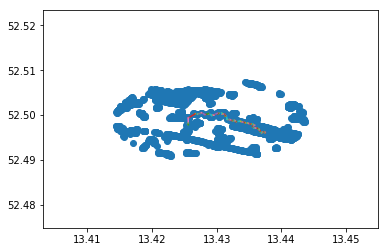

In [24]:
def getPath(start_id,end_id):
    p= nx.algorithms.shortest_paths.weighted.dijkstra_path(G,start_id,end_id)
    return [(i,x[trees[trees.id==i].index][0],y[trees[trees.id==i].index][0]) for i in p]  

path=getPath(231701,259882)
print(path)
scatter(x,y)
for [i1,x1,y1],[i2,x2,y2] in zip(path[:-1],path[1:]):
    plot([x1,x2],[y1,y2])
    